<b> In this notebook we look at how the categorial features, namely the game genres correlate with score/sentiment rating

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# note: mean_time is in days
cont_vars = ['score','num_reviews','sentiment']
cat_vars = ['is_action', 'is_adventure', 'is_casual', 'is_mmo', 'is_racing', 'is_rpg', 'is_simulation', 'is_sports','is_strategy']

data = pd.read_csv('../data/features_vec_all.csv', usecols=cont_vars+cat_vars)

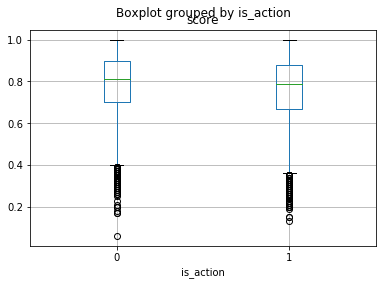

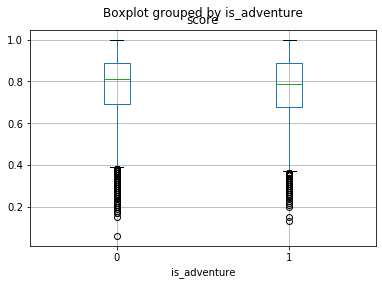

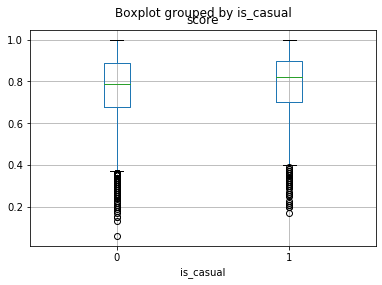

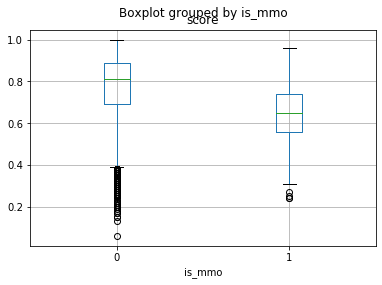

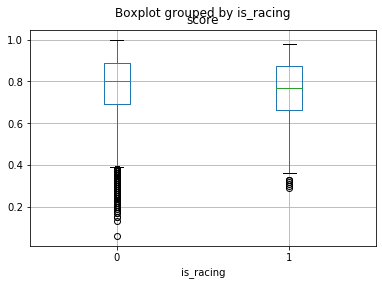

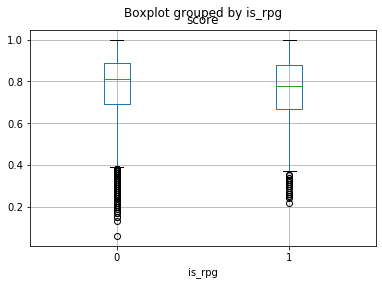

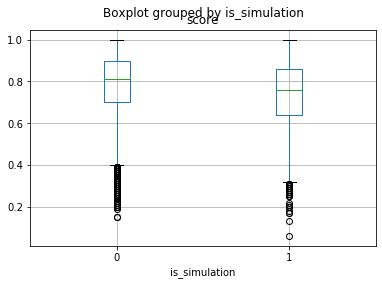

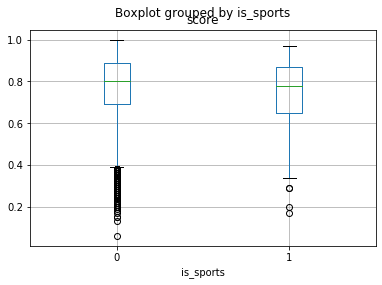

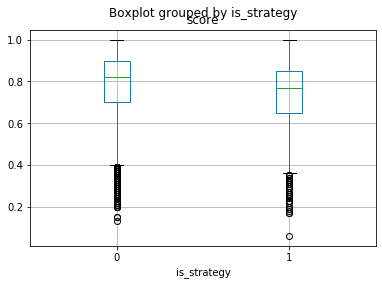

In [36]:
for genre in cat_vars:
    data.boxplot(column='score',by=genre)

<b> Distribution of genres by sentiment

In [51]:
data_ = data.drop(columns=['score', 'num_reviews'])

In [52]:
M = np.zeros((3,len(cat_vars)))
counts_per_sentiment = data_.groupby(['sentiment']).count().values[:,0]

for i in data_.index:
    k = int(data.at[i, 'sentiment'] + 1) # (-1, 0, 1) -> (0, 1, 2)

    for j in range(len(cat_vars)):
        if data_.at[i, cat_vars[j]] == 1:
            M[k][j] += 1 / counts_per_sentiment[k]


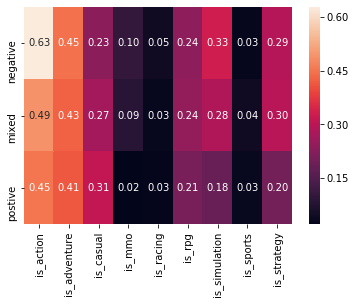

In [55]:
x_labels = cat_vars
y_labels = ['negative', 'mixed', 'postive']
sns.heatmap(M,annot=True, fmt = ".2f", xticklabels=x_labels, yticklabels = y_labels)